In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import scrublet as scr
import os
import warnings
import functools
import seaborn as sns
import scipy.stats
import anndata
import dandelion as ddl
sc.logging.print_header()

warnings.filterwarnings('ignore')
os.chdir('/lustre/scratch117/cellgen/team297/kt16/Ziad/scanpy')

scanpy==1.6.0 anndata==0.7.4 umap==0.4.6 numpy==1.18.5 scipy==1.4.1 pandas==1.1.3 scikit-learn==0.23.2 statsmodels==0.12.0 python-igraph==0.7.1 leidenalg==0.8.2


In [2]:
rna = sc.read_h5ad('h5ad/adata_soupx_trans_cite_rna.h5ad')
adata = sc.read_h5ad('h5ad/adata_soupx_trans_cite_raw.h5ad')
adata2 = sc.read_h5ad('h5ad/adata_soupx_trans_raw.h5ad')
adata3 = sc.read_h5ad('h5ad/adata_soupx_trans_cite_bgshift_raw.h5ad')

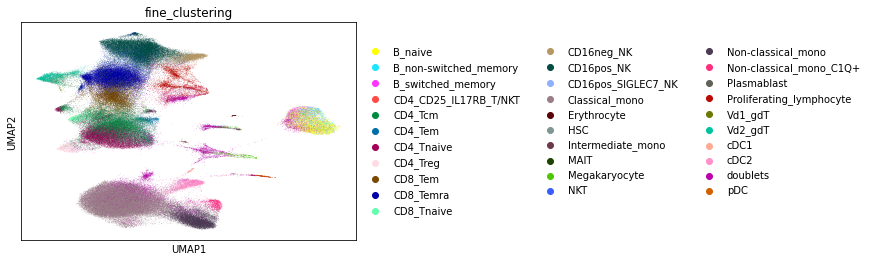

In [5]:
sc.pl.umap(rna, color = 'fine_clustering')

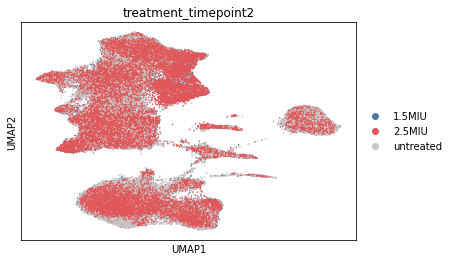

In [7]:
newdict = {'Saline_post':'untreated', 'Saline_pre':'untreated', '2.5MIU_pre':'untreated', '1.5MIU_pre':'untreated', '2.5MIU_post':'2.5MIU', '1.5MIU_post':'1.5MIU' }
rna.obs['treatment_timepoint2'] = [newdict[tx] for tx in rna.obs['treatment_timepoint']]
rna.obs['treatment_timepoint2'] = rna.obs['treatment_timepoint2'].astype('category')
rna.uns['treatment_timepoint2_colors'] = ['#4e79a7', '#e15759', '#C7C7C7']
sc.pl.umap(rna, color = ['treatment_timepoint2'], size = 10, ncols = 1)

In [5]:
import sys
sys.path.append('/lustre/scratch117/cellgen/team297/kt16/scripts')
from tools import returnDEres

In [15]:
adatax = rna[rna.obs['fine_clustering'] == 'CD4_Treg'].copy()
sc.tl.rank_genes_groups(adatax, groupby = 'treatment_timepoint2', groups = ['2.5MIU', '1.5MIU'], reference= 'untreated', method = 'wilcoxon', n_genes=30000, pts= True)

In [19]:
test = returnDEres(adatax, 'rank_genes_groups', '2.5MIU', True)
test2 = returnDEres(adatax, 'rank_genes_groups', '1.5MIU', True)
deg = {'2.5MIU':list(test.iloc[:20].index), '1.5MIU':list(test2.iloc[:20].index)}

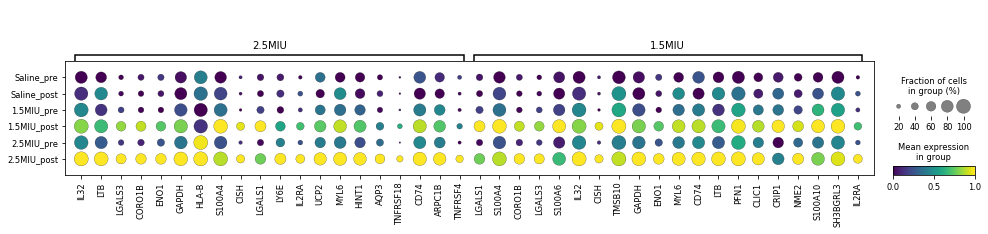

In [20]:
sc.pl.dotplot(adatax, deg, standard_scale = 'var', color_map = 'viridis', var_group_rotation = 0, groupby = 'treatment_timepoint', dendrogram = False)

In [40]:
from collections import defaultdict
data = defaultdict(dict)

for y in list(set(adatax.obs['treatment'])):
    adatay = adatax[adatax.obs['treatment'] == y]
    sc.tl.rank_genes_groups(adatay, groupby = 'timepoint', method = 'wilcoxon', n_genes=30000, pts= True)
    data[y] = returnDEres(adatay)
#     data[y] = data[y][(data[y].pvals_adj < 0.05) & (data[y].pvals < 0.05) & (data[y].pts >= 0.25)]

Trying to set attribute `.uns` of view, copying.
Trying to set attribute `.uns` of view, copying.
Trying to set attribute `.uns` of view, copying.


In [41]:
data['2.5MIU'].loc['LDHA']

scores            1.278489
logfoldchanges    0.290135
pvals             0.201077
pvals_adj         1.000000
pts               0.435383
Name: LDHA, dtype: float64

In [42]:
data['2.5MIU'].loc['LDHB']

scores           -2.916798
logfoldchanges   -0.240211
pvals             0.003536
pvals_adj         0.417164
pts               0.772271
Name: LDHB, dtype: float64

In [43]:
data['1.5MIU'].loc['LDHA']

scores            0.720063
logfoldchanges    0.183092
pvals             0.471486
pvals_adj         1.000000
pts               0.401294
Name: LDHA, dtype: float64

In [39]:
data['1.5MIU'].loc['LDHB']

scores           -3.993079
logfoldchanges   -0.377077
pvals             0.000065
pvals_adj         0.026129
pts               0.702265
Name: LDHB, dtype: float64

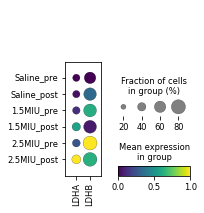

In [29]:
sc.pl.dotplot(adatax, ['LDHA', 'LDHB'], standard_scale = 'var', color_map = 'viridis', var_group_rotation = 0, groupby = 'treatment_timepoint', dendrogram = False)